In [2]:
] add InstantiateFromURL

  Resolving package versions...


LoadError: Unsatisfiable requirements detected for package AlgebraicMultigrid [2169fc97]:
 AlgebraicMultigrid [2169fc97] log:
 ├─AlgebraicMultigrid [2169fc97] has no known versions!
 └─restricted to versions * by an explicit requirement — no versions left

In [5]:
] status

Status `D:\Users\Mori\julia Training\Project.toml`
  [43edad99] InstantiateFromURL v0.5.0


In [ ]:
] add SpecialFunctions

In [3]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0",instantiate = true, precompile = true)

Activated D:\Users\Mori\julia Training\Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


Precompiling project...
┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278
ERROR: LoadError: LoadError: LoadError: UndefVarError: AddrSpacePtr not defined
Stacktrace:
 [1] getproperty(::Module, ::Symbol) at .\Base.jl:26
 [2] top-level scope at C:\Users\Morteza Mohandes\.julia\packages\CUDAnative\e0IdN\src\device\cuda\wmma.jl:52
 [3] include(::Function, ::Module, ::String) at .\Base.jl:380
 [4] include at .\Base.jl:368 [inlined]
 [5] include(::String) at C:\Users\Morteza Mohandes\.julia\packages\CUDAnative\e0IdN\src\CUDAnative.jl:1
 [6] top-level scope at C:\Users\Morteza Mohandes\.julia\packages\CUDAnative\e0IdN\src\device\cuda.jl:15
 [7] include(::Function, ::Module, ::String) at .\Base.jl:380
 [8] include at .\Base.jl:368 [inlined]
 [9] include(::String) at C:\Users\Morteza Mohandes\.julia\packages\CUDAnative\e0IdN\src\CUDAnative.jl:1
 [10] top-level scope at C:\Users\Morteza Mohandes\.julia\packages\CUDAnative\e0IdN\src\CUDAnative.jl:75
 [11] i

In [4]:
using LinearAlgebra, Statistics
using Distributions, Plots, QuadGK, Polynomials, Interpolations
using DataFrames,RDatasets, DataFramesMeta, CategoricalArrays, Query, VegaLite
using ForwardDiff, Zygote, Optim, JuMP, Ipopt, BlackBoxOptim, Roots, NLsolve, LeastSquaresOptim
using Optim: converged, maximum, maximizer, minimizer, iterations
using GLM
# gr(fmt = :png, size=(500,900));

## julia Essentials

In [3]:
s = "    Charlie don't surf";

replace(s, "surf" => "ski")

"    Charlie don't ski"

In [ ]:
match(r"(\d+)", "Top 10") #REGEX

In [ ]:
# nice
function multiplyit(a, g)
    return x -> a * g(x)  # function with `g` used in the closure
end

f(x) = x^2
h = multiplyit(2.0, f)    # use our quadratic, returns a new function which doubles the result
h(2)     # returned function is like any other function

In [ ]:
# nice
function snapabove(g, a)
    function f(x)
        if x > a         # "a" is captured in the closure f
            return g(x)
        else
            return g(a)
        end
    end
    return f    # closure with the embedded a
end

f(x) = x^2
h = snapabove(f, 2.0)

using Plots
gr(fmt=:png);
plot(h, 0.0:0.1:3.0)

In [ ]:
#EX1
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
c=zip(x_vals,y_vals)
# first(c)

In [ ]:
sum(iseven,0:99)

In [ ]:
sum(a,b in [((2, 5), (4, 2), (9, 8), (12, 10))])

In [ ]:
# nice
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum(xy -> all(iseven, xy), pairs)

In [ ]:
? zip

In [ ]:
#EX2
function p(x, coeff)
Sum=0
    for (i,a) in enumerate(coeff)
        Sum += a*x^i;
    end
    return Sum
end
println(p(2,[1,2,2]))

In [ ]:
#EX3
function CountUpper(s)
    U = uppercase(s)
    S=sum([(s[i]== U[i]) for i in eachindex(s)])
    return S
end
CountUpper("SaLAm")

In [ ]:
#EX4
function IsIn(a,b)
   
    return sum([isempty(findall( x -> x == A, b))  for A in a])==0
end
IsIn([1,2,3],[1,1,3,4,5,2])

In [ ]:
#ex5

In [ ]:
#ex6

In [ ]:
#ex7

## Arrays, Tuples, Ranges, and Other Fundamental Types

## Data and Statistics Packages

In [4]:
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing]
df = DataFrame(commod = commodities, price = last_price)

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


In [5]:
DataFrames.describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,commod,,crude,,silver,4,,String
2,price,9.2,4.2,11.3,12.1,,1,"Union{Missing, Float64}"


## Generic Programming

In [ ]:
x=1
y = Normal()
z = "foo"
@show x, y, z
@show typeof(x), typeof(y), typeof(z)
@show supertype(typeof(x))

# pipe operator, |>, is is equivalent
@show typeof(x) |> supertype
@show Base.show_supertypes(Int64)

p = Polynomial(2 - 5*x + 2*x^2)
(p(0.1), p′(0.1)) = (1.52, -4.6)
roots(p) = [0.5, 2.0]


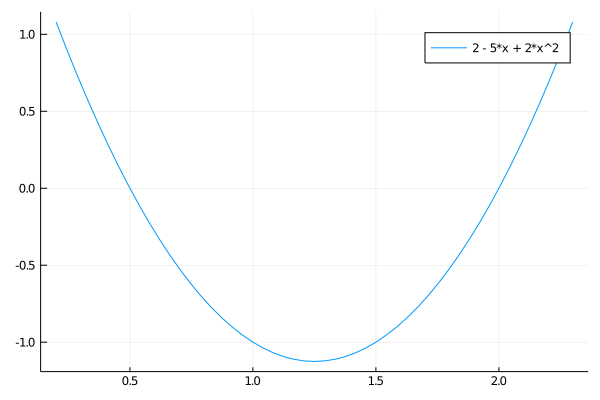

In [7]:
#EX3
using Polynomials
using Plots
p = Polynomial([2, -5, 2], :x) # :x just gives a symbol for display
@show p
p′ = derivative(p) # gives the derivative of p, another polynomial
@show p(0.1), p′(0.1) # call like a function
@show roots(p); # find roots such that p(x) = 0
plot(p)

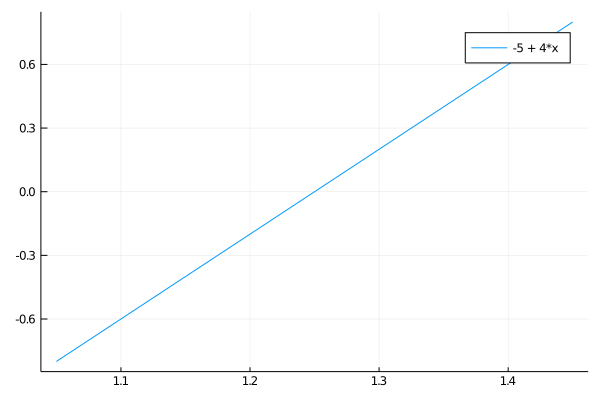

In [8]:
plot(p′)

In [5]:
#ex 4
function newtonsmethod(p::Polynomial, x_0; tolerance = 1E-7, maxiter = 100)
    x_old = x_0;
    normdiff = Inf
    iter = 1
    f=p
    p′=derivative(f)
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old - f(x_old)/p′(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end
f(x)= (x-1)^3;
f_pr(x) = 3(x-1)^2;
p = Polynomial([2, -5, 2], :x)
@show roots(p)
@show newtonsmethod(p,0.5)

roots(p) = [0.5, 2.0]
newtonsmethod(p, 0.5) = (value = 0.5, normdiff = 0.0, iter = 2)


(value = 0.5, normdiff = 0.0, iter = 2)

In [67]:
nt = (t = 1, col1 = 3.0)
df2 = DataFrame([nt])
push!(df2, (t=3, col1 = 4.0))

commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing]
df = DataFrame(commod = commodities, price = last_price)

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


In [73]:
allowmissing!(df2,:col1)
push!(df2, (t=3, col1 = missing))
push!(df2, (t=4, col1 = 5.1))

,t,col1
,Int64,Float64?
1,1,3.0
2,3,4.0
3,3,missing
4,4,5.1


In [77]:
# describe(df2.col1)
@show mean(df2.col1)
@show mean(skipmissing(df2.col1))
@show mean(coalesce.(df2.col1,0))
f(x) = x^2
df3 = @transform(df2, col2 = f.(:col1))

mean(df2.col1) = missing
mean(skipmissing(df2.col1)) = 4.033333333333333
mean(coalesce.(df2.col1, 0)) = 3.025


,t,col1,col2
,Int64,Float64?,Float64?
1,1,3.0,9.0
2,3,4.0,16.0
3,3,missing,missing
4,4,5.1,26.01


In [81]:
id = [1, 2, 3, 4]
y = ["old", "young", "young", "old"]
y = CategoricalArray(y)
df4 = DataFrame(id=id, y=y)
# levels(df4.y)\
(df4.y)

4-element CategoricalArray{String,1,UInt32}:
 "old"
 "young"
 "young"
 "old"

In [83]:
using Query

df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

x = @from i in df begin
    @where i.age>40
    @select {i.name, i.children}
    @collect DataFrame
end

,name,children
,String,Int64
1,Sally,5
2,Kirk,2


WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


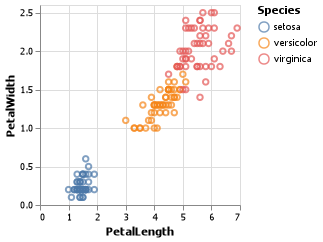

In [84]:
iris = dataset("datasets", "iris")

iris |> @vlplot(
    :point,
    x=:PetalLength,
    y=:PetalWidth,
    color=:Species
)

In [9]:
using RegressionTables
x = randn(100)
y = 0.9 .* x + 0.5 * rand(100)
df = DataFrame(x=x, y=y)
ols = lm(@formula(y ~ x), df) # R-style notation
regtable(ols)


----------------------
                  y   
              --------
                   (1)
----------------------
(Intercept)   0.239***
               (0.015)
x             0.882***
               (0.015)
----------------------
Estimator          OLS
----------------------
N                  100
R2               0.974
----------------------




In [11]:
struct DualNumber{T} <: Real
    val::T
    ϵ::T
end

In [10]:
import Base: +, *, -, ^, exp
+(x::DualNumber, y::DualNumber) = DualNumber(x.val + y.val, x.ϵ + y.ϵ)  # dual addition
+(x::DualNumber, a::Number) = DualNumber(x.val + a, x.ϵ)  # i.e. scalar addition, not dual
+(a::Number, x::DualNumber) = DualNumber(x.val + a, x.ϵ)  # i.e. scalar addition, not dual


+ (generic function with 333 methods)

In [14]:
f(x, y) = 3.0 + x + y

x = DualNumber(2.0, 1.0)  # x -> 2.0 + 1.0\epsilon
y = DualNumber(3.0, 0.0)  # i.e. y = 3.0, no derivative


# seeded calculates both teh function and the d/dx gradient!
f(x,y)

DualNumber{Float64}(8.0, 1.0)

In [1]:
randn(5).^2

5-element Array{Float64,1}:
 6.291072042973976
 0.7732079313590482
 1.2369405960998916
 1.568540597575361
 0.5112201505512024